In [ ]:
# this is a simple example of GxE

In [1]:
import random
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
# make toy data
df=pd.DataFrame()
df['E']= [1] * 50 + [2] * 50  # environment
df['G']=[ random.choice([0, 1, 2]) for _ in range(100) ]  # genotype
df['pheno']= np.random.rand(100) * (df['G'] + 1) * df['E']  # phenotype

In [3]:
df

,E,G,pheno
0,1,1,1.641334
1,1,0,0.843684
2,1,0,0.979146
3,1,1,1.365375
4,1,0,0.871650
...,...,...,...
95,2,0,0.071100
96,2,0,0.516465
97,2,0,0.051488
98,2,0,0.655364


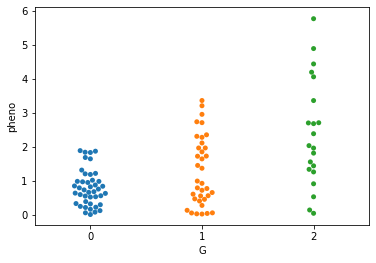

In [4]:
sns.swarmplot(data=df, x='G', y='pheno')

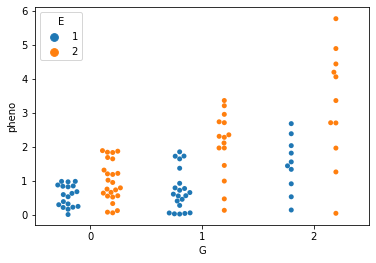

In [5]:
sns.swarmplot(data=df, x='G', y='pheno', hue='E', dodge=True)

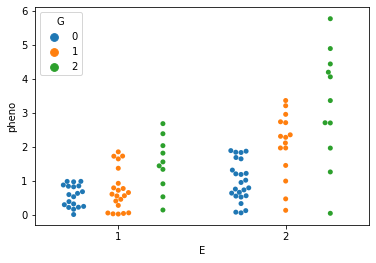

In [6]:
sns.swarmplot(data=df, x='E', y='pheno', hue='G', dodge=True)

In [8]:
# fit linear model for G
reg=smf.ols(formula='pheno ~ G', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pheno   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     33.49
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           8.61e-08
Time:                        13:42:21   Log-Likelihood:                -141.86
No. Observations:                 100   AIC:                             287.7
Df Residuals:                      98   BIC:                             292.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7089      0.144      4.929      0.000       0.424       0.994
G              0.7598      0.131      5.787      0.000       0.499       1.020
==============================================================================
Omnibus:                        9.767   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.130
Skew:                           0.623   Prob(JB):                      0.00631
Kurtosis:                       3.937   Cond. No.                         2.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# fit linear model, GxE
df['GxE']= df['G'] * df['E']
reg=smf.ols(formula='pheno ~ G + E + GxE', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pheno   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     33.60
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           6.20e-15
Time:                        13:43:06   Log-Likelihood:                -120.67
No. Observations:                 100   AIC:                             249.3
Df Residuals:                      96   BIC:                             259.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0407      0.383     -0.106      0.916      -0.801       0.720
G             -0.2740      0.348     -0.787      0.433      -0.965       0.417
E              0.5036      0.236      2.132      0.036       0.035       0.972
GxE            0.6961      0.215      3.230      0.002       0.268       1.124
==============================================================================
Omnibus:                       11.709   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               21.830
Skew:                          -0.417   Prob(JB):                     1.82e-05
Kurtosis:                       5.131   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''

Interpretation:

  Here we prepared toy data for GxE.
  
  We still observed high beta for G even when we did not
  put the interaction term 'GxE' in the regression model.
  
  When we put 'GxE' in the regression model, beta for G
  decreased. Instead, beta for GxE got high value, showing
  appropriate model selction is important to get more
  meaningful results.
  
  It is also interesting that we can see lower AIC for
  the model with the 'GxE' interaction term.
  
  Caveats: Here, I did not standalize data for simplicity. In real cases,
           we need to standalize data to obtain appropriate beta.
           (see also chapter 11)
  
'''